In [49]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score

In [2]:
df = pd.read_csv("Salary_dataset.csv")

In [5]:
df.describe()

,Unnamed: 0,YearsExperience,Salary
count,30.000000,30.000000,30.000000
mean,14.500000,5.413333,76004.000000
std,8.803408,2.837888,27414.429785
min,0.000000,1.200000,37732.000000
25%,7.250000,3.300000,56721.750000
50%,14.500000,4.800000,65238.000000
75%,21.750000,7.800000,100545.750000
max,29.000000,10.600000,122392.000000


In [7]:
df = df[["YearsExperience","Salary"]]

# 1-correlation 

In [8]:
df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


(0.0, 133928.1442748984)

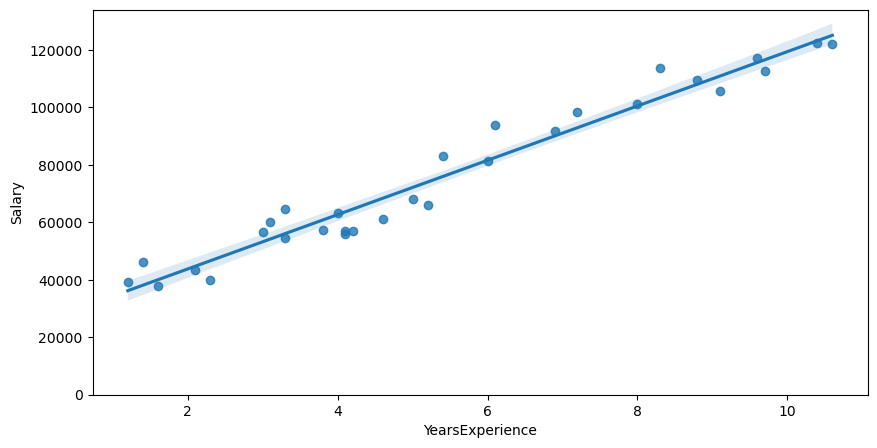

In [11]:
plt.figure(figsize=(10,5))
sns.regplot( x = "YearsExperience" , y = "Salary" , data = df)
plt.ylim(0.)


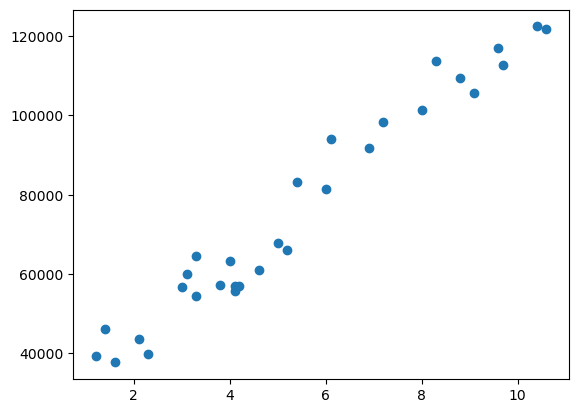

In [13]:
plt.scatter(df['YearsExperience'] , df['Salary'])

In [26]:
from scipy import stats
pearson_coef,p_value = stats.pearsonr(df['YearsExperience'],df['Salary'])
print(pearson_coef,p_value)

0.9782416184887598 1.1430681092271567e-20


a pearson coef with a value of 0.98 means that there is a strong linear positive relationship between the ['YearsExperience'] and ['Salary'] with a p-value of 1.1430681092271567e-20 which means that the reasult are statiscaly significant 

# 2-splitting the data and SLR

In [28]:
x = df[['YearsExperience']].values
y = df['Salary'].values

In [29]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

In [30]:
LM = LinearRegression()
LM

LinearRegression()

In [31]:
LM.fit(x_train,y_train)

LinearRegression()

In [36]:
Yhat = LM.predict(x_test)
Yhat[0:5]

array([ 44437.86200307, 101085.47443194,  76122.11980227,  55959.41029369,
       126048.8290616 ])

In [53]:
Yhat2 = LM.predict(x_train)
Yhat2

array([ 37716.95883355,  63640.44248743, 116447.53881942, 103965.86150459,
        72281.6037054 ,  82843.02297179,  74201.86175383,  39637.21688198,
        54039.15224525,  93404.44223819,  68441.08760852,  60760.05541478,
       124128.57101317,  64600.57151165,  46358.12005151,  81882.89394758,
        55959.41029369, 117407.66784364,  35796.70078511,  62680.31346322,
       108766.50662568])

In [32]:
LM.intercept_

24275.15249449594

In [33]:
LM.coef_

array([9601.29024218])

##### Yhat = 24275.15249449594 + ('YearsExperience'*9601.29024218)

# 3-model evaluation

In [57]:
# for Yhat
MSE = mean_squared_error(y_test,Yhat )
R_2 = LM.score(x_test,Yhat)
print( "the mean squared value is " ,MSE, "the r^2 value is ",R_2)


the mean squared value is  18305339.362009726 the r^2 value is  1.0


In [58]:
#for YHAT2
MSE = mean_squared_error(y_train,Yhat2 )
R_2 = LM.score(x_train,Yhat2)
print( "the mean squared value is " ,MSE, "the r^2 value is ",R_2)


the mean squared value is  37168877.84016077 the r^2 value is  1.0


our R_2 is equal to 1 which means 100% of the variation of the salary is explained with the  independent variable YearsExperience  

In [50]:
MAE = mean_absolute_error(y_test,Yhat )
MAE

3478.9738803731243

C:\Users\ayman\AppData\Local\Temp\ipykernel_13792\124190752.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(y_test , hist=False , color = "r" , label = "actual values")
C:\Users\ayman\AppData\Local\Temp\ipykernel_13792\124190752.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  

<Axes: ylabel='Density'>

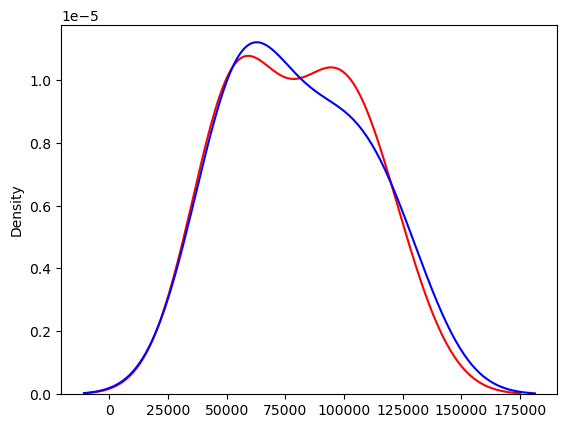

In [52]:
ax1 = sns.distplot(y_test , hist=False , color = "r" , label = "actual values")
sns.distplot(Yhat , hist = False , color = "b" , label ="predicted values ", ax = ax1)

C:\Users\ayman\AppData\Local\Temp\ipykernel_13792\211557720.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(y_train , hist=False , color = "r" , label = "actual values")
C:\Users\ayman\AppData\Local\Temp\ipykernel_13792\211557720.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

 

<Axes: ylabel='Density'>

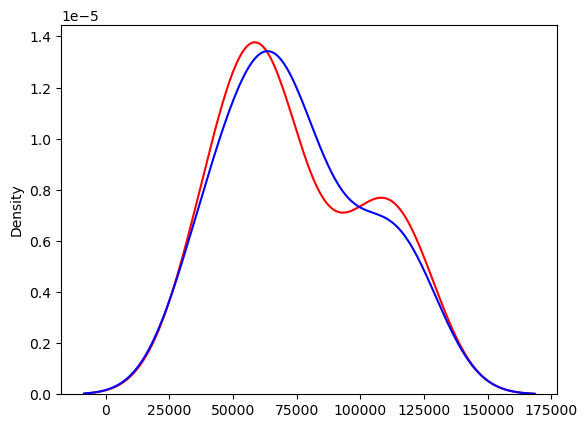

In [54]:
ax1 = sns.distplot(y_train , hist=False , color = "r" , label = "actual values")
sns.distplot(Yhat2 , hist = False , color = "b" , label ="predicted values ", ax = ax1)

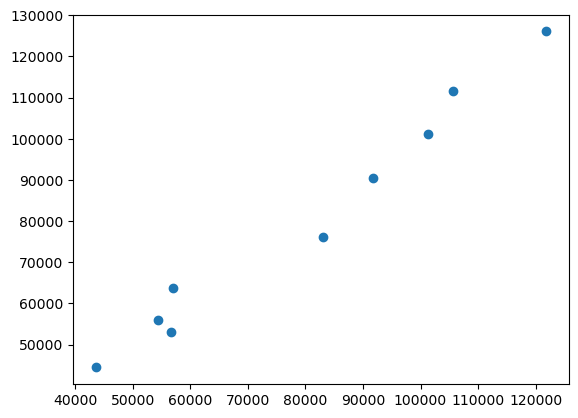

In [59]:
plt.scatter(y_test , Yhat)

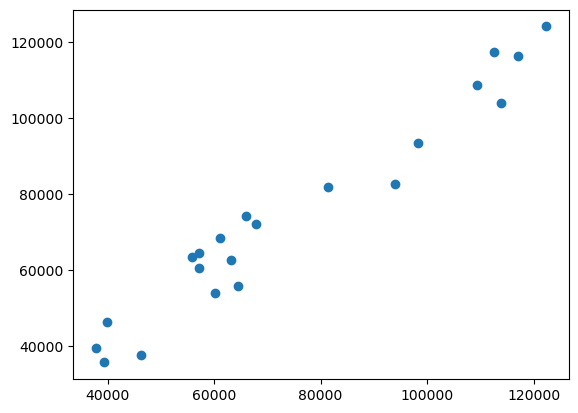

In [61]:
plt.scatter(y_train,Yhat2)

In [72]:
predicted_df = pd.DataFrame({ "predicted value 30 %":Yhat , "actual values ":y_test , "diff" :y_test-Yhat })
predicted_df.head()

,predicted value 30 %,actual values,diff
0,44437.862003,43526.0,-911.862003
1,101085.474432,101303.0,217.525568
2,76122.119802,83089.0,6966.880198
3,55959.410294,54446.0,-1513.410294
4,126048.829062,121873.0,-4175.829062


In [69]:
predicted_df['diff'].sum()

-7384.110164915095

In [71]:
predicted_df2 = pd.DataFrame({ "predicted value 70 %":Yhat2 , "actual values ":y_train , "diff" :y_train-Yhat2 })
predicted_df2.head()

,predicted value 70 %,actual values,diff
0,37716.958834,46206.0,8489.041166
1,63640.442487,55795.0,-7845.442487
2,116447.538819,116970.0,522.461181
3,103965.861505,113813.0,9847.138495
4,72281.603705,67939.0,-4342.603705


In [73]:
predicted_df2['diff'].sum()

-1.2369127944111824e-10